# “数据分析”就业行情

## *PRD1*数据加值宣言

本项目产出自按“数据分析”为关键词，挖掘的关于 *猎聘网中各行业* 的工作数据（<b>共20760条,详见[数据分析_总.xlsx]</b>），以解决（不一定准确，但具有参考价值）“数据分析师”就业需求及特性的就业分析问题。

* 关键词：数据分析
* 页数：所有（1-10）
* 类别数据：学历、经验、薪水、时间、职称、公司地点、公司名称、链结、公司URL、所属行业


## *PRD2*数据加值

产品核心价值：通过分析各行业的数据，总结“数据分析”一职的基本要求，进而刻画“数据分析”的职业要求形象。

数据分析师的价值在于从数据中挖掘有效信息，精准反馈和有效决策业务指标和企业发展方向。

<b>依本产品总结：</b>
1.  职业学历要求：大专及本科以上
2. 工作经验要求：3-5年（5-10年及1-3年随后）
3. 公司地点：最多需求的公司分布在上海，深圳和广州随后
4. 发布职位需求的公司：不论大厂还是小厂，都有“数据分析”的需要
5. 薪资：多数公司是面议工资，除面议外，10-15k·12薪占大多数，最低到3-7k，可估知平均薪资约为7-10k。
6. 工作职位：以“销售经理”，“销售代表”，“产品经理”占据前三，说明拥有“数据分析”能力的此三项职位对企业/公司更有吸引力。


## Query参数

keyword：数据分析

industries：行业

curPage：页码


# 执行

## 获取行业和链接


In [16]:
from requests_html import HTMLSession
url = "https://www.liepin.com/zhaopin/?keyword=数据分析"
session = HTMLSession()
r = session.get( url )

行业链结 = r.html.xpath('//ul[@class="clearfix"]/li/div/a/@href')
# 行业链结

行业名 = r.html.xpath('//ul[@class="clearfix"]/li/div/a/text()')
# 行业名

结合 = dict(zip(行业名,行业链结))
结合

{'互联网/电商': '/zhaopin/?subIndustry=&init=-1&industryType=industry_01&headckid=0e41053b1cc8a5b8&flushckid=1&fromSearchBtn=2&industries=040&keyword=%E6%95%B0%E6%8D%AE%E5%88%86%E6%9E%90&ckid=0e41053b1cc8a5b8&siTag=1B2M2Y8AsgTpgAmY7PhCfg%7EfA9rXquZc5IkJpXC-Ycixw&d_sfrom=search_unknown&d_ckId=6c13dced5e1ffda145a444217f4ef887&d_curPage=0&d_pageSize=40&d_headId=6c13dced5e1ffda145a444217f4ef887',
 '游戏产业': '/zhaopin/?subIndustry=&init=-1&industryType=industry_01&headckid=0e41053b1cc8a5b8&flushckid=1&fromSearchBtn=2&industries=420&keyword=%E6%95%B0%E6%8D%AE%E5%88%86%E6%9E%90&ckid=0e41053b1cc8a5b8&siTag=1B2M2Y8AsgTpgAmY7PhCfg%7EfA9rXquZc5IkJpXC-Ycixw&d_sfrom=search_unknown&d_ckId=6c13dced5e1ffda145a444217f4ef887&d_curPage=0&d_pageSize=40&d_headId=6c13dced5e1ffda145a444217f4ef887',
 '计算机软件': '/zhaopin/?subIndustry=&init=-1&industryType=industry_01&headckid=0e41053b1cc8a5b8&flushckid=1&fromSearchBtn=2&industries=010&keyword=%E6%95%B0%E6%8D%AE%E5%88%86%E6%9E%90&ckid=0e41053b1cc8a5b8&siTag=1B2M2Y8AsgT

## 分析链接

In [17]:
from urllib.parse import urlparse, parse_qs
import pandas as pd

链接分析=[ urlparse(x) for x in 结合.values()]
df = pd.DataFrame(链接分析)

In [19]:
# 观察链接分析
# df.info()
df.nunique()   # df.nunique() 返回的是唯一值的个数
# df.head()

scheme       1
netloc       1
path         1
params       1
query       51
fragment     1
dtype: int64

In [23]:
# 对query再解析
# df_qs = pd.DataFrame([ parse_qs(x) for x in df['query'] ])
df_qs = pd.DataFrame([{k:v[0] for k,v in parse_qs(x).items()} for x in df['query'] ])
print (df_qs.nunique())
df_qs.head()
# df_qs[['keyword','compTag']]

init              1
industryType     12
headckid          1
flushckid         1
fromSearchBtn     1
industries       51
keyword           1
ckid              1
siTag             1
d_sfrom           1
d_ckId            1
d_curPage         1
d_pageSize        1
d_headId          1
dtype: int64


,init,industryType,headckid,flushckid,fromSearchBtn,industries,keyword,ckid,siTag,d_sfrom,d_ckId,d_curPage,d_pageSize,d_headId
0,-1,industry_01,0e41053b1cc8a5b8,1,2,040,数据分析,0e41053b1cc8a5b8,1B2M2Y8AsgTpgAmY7PhCfg~fA9rXquZc5IkJpXC-Ycixw,search_unknown,6c13dced5e1ffda145a444217f4ef887,0,40,6c13dced5e1ffda145a444217f4ef887
1,-1,industry_01,0e41053b1cc8a5b8,1,2,420,数据分析,0e41053b1cc8a5b8,1B2M2Y8AsgTpgAmY7PhCfg~fA9rXquZc5IkJpXC-Ycixw,search_unknown,6c13dced5e1ffda145a444217f4ef887,0,40,6c13dced5e1ffda145a444217f4ef887
2,-1,industry_01,0e41053b1cc8a5b8,1,2,010,数据分析,0e41053b1cc8a5b8,1B2M2Y8AsgTpgAmY7PhCfg~fA9rXquZc5IkJpXC-Ycixw,search_unknown,6c13dced5e1ffda145a444217f4ef887,0,40,6c13dced5e1ffda145a444217f4ef887
3,-1,industry_01,0e41053b1cc8a5b8,1,2,030,数据分析,0e41053b1cc8a5b8,1B2M2Y8AsgTpgAmY7PhCfg~fA9rXquZc5IkJpXC-Ycixw,search_unknown,6c13dced5e1ffda145a444217f4ef887,0,40,6c13dced5e1ffda145a444217f4ef887
4,-1,industry_02,0e41053b1cc8a5b8,1,2,050,数据分析,0e41053b1cc8a5b8,1B2M2Y8AsgTpgAmY7PhCfg~fA9rXquZc5IkJpXC-Ycixw,search_unknown,6c13dced5e1ffda145a444217f4ef887,0,40,6c13dced5e1ffda145a444217f4ef887


In [25]:
# 创建参数模板
def parse_url_qs_for_compTag (url):
    six_parts = urlparse(url) 
    out = parse_qs(six_parts.query)
    return (out)
参数模板 = parse_url_qs_for_compTag(list(结合.values())[0])
print(参数模板)

[ parse_url_qs_for_compTag(x)['industries'][0] for x in 结合.values()]

字典_compTag = { k:parse_url_qs_for_compTag(v)['industries'][0] for k,v in 结合.items()}
print (字典_compTag)

{'init': ['-1'], 'industryType': ['industry_01'], 'headckid': ['0e41053b1cc8a5b8'], 'flushckid': ['1'], 'fromSearchBtn': ['2'], 'industries': ['040'], 'keyword': ['数据分析'], 'ckid': ['0e41053b1cc8a5b8'], 'siTag': ['1B2M2Y8AsgTpgAmY7PhCfg~fA9rXquZc5IkJpXC-Ycixw'], 'd_sfrom': ['search_unknown'], 'd_ckId': ['6c13dced5e1ffda145a444217f4ef887'], 'd_curPage': ['0'], 'd_pageSize': ['40'], 'd_headId': ['6c13dced5e1ffda145a444217f4ef887']}
{'互联网/电商': '040', '游戏产业': '420', '计算机软件': '010', 'IT服务': '030', '电子/芯片/半导体': '050', '通信业': '060', '计算机/网络设备': '020', '房地产/建筑': '080', '规划/设计/装潢': '100', '房地产服务': '090', '银行': '130', '保险': '140', '基金/证券/投资': '150', '会计/审计': '430', '信托/担保/拍卖': '500', '快消品': '190', '批发零售': '240', '服装纺织': '200', '家具/家电': '210', '办公设备': '220', '奢侈品/收藏品': '460', '珠宝/玩具/工艺品': '470', '汽车/摩托车': '350', '机械/机电/重工': '360', '印刷/包装/造纸': '180', '原材料加工': '370', '仪器/电气/自动化': '340', '制药/生物工程': '270', '医疗/保健/美容': '280', '医疗器械': '290', '能源/水利': '330', '石油/化工': '310', '采掘/冶炼/矿产': '320', '环保': '300'

In [28]:
def 参数模板生成(industries , keyword ):
    参数 = 参数模板.copy()
    参数['industries'] = industries
    参数['keyword'] = keyword
    return (参数)

数据分析参数 = { k:参数模板生成(industries= [v], keyword = ['数据分析']) for k,v in 字典_compTag.items()}
print(数据分析参数)

{'互联网/电商': {'init': ['-1'], 'industryType': ['industry_01'], 'headckid': ['0e41053b1cc8a5b8'], 'flushckid': ['1'], 'fromSearchBtn': ['2'], 'industries': ['040'], 'keyword': ['数据分析'], 'ckid': ['0e41053b1cc8a5b8'], 'siTag': ['1B2M2Y8AsgTpgAmY7PhCfg~fA9rXquZc5IkJpXC-Ycixw'], 'd_sfrom': ['search_unknown'], 'd_ckId': ['6c13dced5e1ffda145a444217f4ef887'], 'd_curPage': ['0'], 'd_pageSize': ['40'], 'd_headId': ['6c13dced5e1ffda145a444217f4ef887']}, '游戏产业': {'init': ['-1'], 'industryType': ['industry_01'], 'headckid': ['0e41053b1cc8a5b8'], 'flushckid': ['1'], 'fromSearchBtn': ['2'], 'industries': ['420'], 'keyword': ['数据分析'], 'ckid': ['0e41053b1cc8a5b8'], 'siTag': ['1B2M2Y8AsgTpgAmY7PhCfg~fA9rXquZc5IkJpXC-Ycixw'], 'd_sfrom': ['search_unknown'], 'd_ckId': ['6c13dced5e1ffda145a444217f4ef887'], 'd_curPage': ['0'], 'd_pageSize': ['40'], 'd_headId': ['6c13dced5e1ffda145a444217f4ef887']}, '计算机软件': {'init': ['-1'], 'industryType': ['industry_01'], 'headckid': ['0e41053b1cc8a5b8'], 'flushckid': ['1'], 

In [29]:
url = "https://www.liepin.com/zhaopin/"
session = HTMLSession()
payload = 数据分析参数['互联网/电商']
r = session.get( url, params = payload)
r.url

'https://www.liepin.com/zhaopin/?init=-1&industryType=industry_01&headckid=0e41053b1cc8a5b8&flushckid=1&fromSearchBtn=2&industries=040&keyword=%E6%95%B0%E6%8D%AE%E5%88%86%E6%9E%90&ckid=0e41053b1cc8a5b8&siTag=1B2M2Y8AsgTpgAmY7PhCfg~fA9rXquZc5IkJpXC-Ycixw&d_sfrom=search_unknown&d_ckId=6c13dced5e1ffda145a444217f4ef887&d_curPage=0&d_pageSize=40&d_headId=6c13dced5e1ffda145a444217f4ef887'

In [30]:
def requests_liepin( url, params):
    r = session.get( url , params = payload)

    # 先取特定元素, 精准打击其子后辈
    主要元素 = r.html.xpath( '//ul[@class="sojob-list"]/li')

    # 作为xpath字典，键为我要抓的牛肉名称，值为xpath
    dict_xpaths={ 
        'text': {
            'edu':      '//div[contains(@class,"job-info")]/p/span[@class="edu"]',
            '经验':      '//div[contains(@class,"job-info")]/p/span[@class="edu"]/following-sibling::span',
            '薪水':    '//div[contains(@class,"job-info")]/p/span[@class="text-warning"]', 
            '时间':    '//div[contains(@class,"job-info")]/p/time/@title', 
            '职称':    '//div[contains(@class,"job-info")]/h3/a', 
            '公司地点': '//div[contains(@class,"job-info")]/p/a',
            '公司名称': '//div[contains(@class,"sojob-item-main")]//p[@class="company-name"]/a', 
        },
        'text_content': {
        },
        'href': {
            '链结':    '//div[contains(@class,"job-info")]/h3/a', 
            '公司URL': '//div[contains(@class,"sojob-item-main")]//p[@class="company-name"]/a', 
        }
    }

    def get_e_text_content(_xpath_):
        # 高级列表推导
        暂存结果 = [e.xpath(_xpath_)[0].lxml.text_content() for e in 主要元素]
        return(暂存结果)

    def get_e_text(_xpath_):
        # 高级列表推导
        暂存结果 = ["".join([x.strip() if type(x) is str else x.text.strip() for x in e.xpath(_xpath_)]) for e in 主要元素]
        return(暂存结果)

    def get_e_href(_xpath_):
        # 高级列表推导
        暂存结果 = [list(e.xpath(_xpath_, first=True).absolute_links)[0] \
                   if len(e.xpath(_xpath_, first=True).absolute_links) >= 1  \
                   else "" for e in 主要元素]
        return(暂存结果)

    # 只对主要元素下进行.xpath取值
    数据字典 = dict()

    数据字典 = {k:get_e_text_content(v) for k,v in dict_xpaths['text_content'].items()}
    数据字典.update({k:get_e_text(v) for k,v in dict_xpaths['text'].items()})
    数据字典.update({k:get_e_href(v) for k,v in dict_xpaths['href'].items()})

    数据 = pd.DataFrame(数据字典)
    #数据.to_excel("20春_Web数据挖掘_week03_liepin.xlsx", sheet_name="搜查结果")
    return (数据)

In [33]:
url = "https://www.liepin.com/zhaopin/"

list_df = list()
for k,v in 数据分析参数.items():
    payload = v
    df = requests_liepin( url, params = payload)
    df = df.assign (热门公司类型 = k)    
    list_df.append(df)

df_all = pd.concat(list_df)
df_all.to_excel('数据分析.xlsx')

## 翻页

In [38]:
# 需要模组库
from urllib.parse import urlparse, parse_qs
import pandas as pd
from IPython.display import display, HTML

# 总体目标：输入 href_列表, 建构出参数字典
xpath_翻页a = '//div[@class="pagerbar"]/a' # 有disabled, current等href是javascript
xpath_翻页a = '//div[@class="pagerbar"]/a[starts-with(@href,"/zhaopin")]'
# print (r.html.xpath(xpath_翻页a)) # 物件

href_列表 = [x.xpath('//@href')[0] for x in r.html.xpath(xpath_翻页a)]
#print (href_列表)

文字_列表 = [x.text for x in r.html.xpath(xpath_翻页a)]
#print (文字_列表)

href_字典 = {x.text:x.xpath('//@href')[0]  for x in r.html.xpath(xpath_翻页a)}
# print (href_字典)


# urlparse 解析后丢入数据框
df = pd.DataFrame([ urlparse(x) for x in href_列表])
df_qs = pd.DataFrame([{k:v[0] for k,v in parse_qs(x).items()} for x in df['query'] ])

display(df)
print(df.nunique())
display(df_qs)
# print(df_qs.nunique())

df_qs.curPage
df_qs = df_qs.assign (curPage_int=df_qs.curPage.astype(int)) # 变成整数

,scheme,netloc,path,params,query,fragment
0,,,/zhaopin/,,init=-1&headckid=0e41053b1cc8a5b8&fromSearchBt...,
1,,,/zhaopin/,,init=-1&headckid=0e41053b1cc8a5b8&fromSearchBt...,
2,,,/zhaopin/,,init=-1&headckid=0e41053b1cc8a5b8&fromSearchBt...,
3,,,/zhaopin/,,init=-1&headckid=0e41053b1cc8a5b8&fromSearchBt...,
4,,,/zhaopin/,,init=-1&headckid=0e41053b1cc8a5b8&fromSearchBt...,
5,,,/zhaopin/,,init=-1&headckid=0e41053b1cc8a5b8&fromSearchBt...,


scheme      1
netloc      1
path        1
params      1
query       5
fragment    1
dtype: int64


,init,headckid,fromSearchBtn,ckid,industryType,industries,keyword,siTag,d_sfrom,d_ckId,d_curPage,d_pageSize,d_headId,curPage
0,-1,0e41053b1cc8a5b8,2,9b05ed1467d99ec9°radeFlag=0,industry_01,040,数据分析,1B2M2Y8AsgTpgAmY7PhCfg~1p1Hf6Iytm4nd3ac31P45g,search_unknown,8db2e3167fdf564018a0400275937130,0,40,6c13dced5e1ffda145a444217f4ef887,1
1,-1,0e41053b1cc8a5b8,2,9b05ed1467d99ec9°radeFlag=0,industry_01,040,数据分析,1B2M2Y8AsgTpgAmY7PhCfg~1p1Hf6Iytm4nd3ac31P45g,search_unknown,8db2e3167fdf564018a0400275937130,0,40,6c13dced5e1ffda145a444217f4ef887,2
2,-1,0e41053b1cc8a5b8,2,9b05ed1467d99ec9°radeFlag=0,industry_01,040,数据分析,1B2M2Y8AsgTpgAmY7PhCfg~1p1Hf6Iytm4nd3ac31P45g,search_unknown,8db2e3167fdf564018a0400275937130,0,40,6c13dced5e1ffda145a444217f4ef887,3
3,-1,0e41053b1cc8a5b8,2,9b05ed1467d99ec9°radeFlag=0,industry_01,040,数据分析,1B2M2Y8AsgTpgAmY7PhCfg~1p1Hf6Iytm4nd3ac31P45g,search_unknown,8db2e3167fdf564018a0400275937130,0,40,6c13dced5e1ffda145a444217f4ef887,4
4,-1,0e41053b1cc8a5b8,2,9b05ed1467d99ec9°radeFlag=0,industry_01,040,数据分析,1B2M2Y8AsgTpgAmY7PhCfg~1p1Hf6Iytm4nd3ac31P45g,search_unknown,8db2e3167fdf564018a0400275937130,0,40,6c13dced5e1ffda145a444217f4ef887,1
5,-1,0e41053b1cc8a5b8,2,9b05ed1467d99ec9°radeFlag=0,industry_01,040,数据分析,1B2M2Y8AsgTpgAmY7PhCfg~1p1Hf6Iytm4nd3ac31P45g,search_unknown,8db2e3167fdf564018a0400275937130,0,40,6c13dced5e1ffda145a444217f4ef887,9


In [39]:
def parse_url_qs_for_curPage (url):
    six_parts = urlparse(url) 
    out = parse_qs(six_parts.query)
    return (out)

# 取一例做模板
翻页参数模板 = parse_url_qs_for_curPage(href_列表[0])
print (翻页参数模板)

print (href_字典)

{'init': ['-1'], 'headckid': ['0e41053b1cc8a5b8'], 'fromSearchBtn': ['2'], 'ckid': ['9b05ed1467d99ec9°radeFlag=0'], 'industryType': ['industry_01'], 'industries': ['040'], 'keyword': ['数据分析'], 'siTag': ['1B2M2Y8AsgTpgAmY7PhCfg~1p1Hf6Iytm4nd3ac31P45g'], 'd_sfrom': ['search_unknown'], 'd_ckId': ['8db2e3167fdf564018a0400275937130'], 'd_curPage': ['0'], 'd_pageSize': ['40'], 'd_headId': ['6c13dced5e1ffda145a444217f4ef887'], 'curPage': ['1']}
{'2': '/zhaopin/?init=-1&headckid=0e41053b1cc8a5b8&fromSearchBtn=2&ckid=9b05ed1467d99ec9°radeFlag=0&industryType=industry_01&industries=040&keyword=%E6%95%B0%E6%8D%AE%E5%88%86%E6%9E%90&siTag=1B2M2Y8AsgTpgAmY7PhCfg%7E1p1Hf6Iytm4nd3ac31P45g&d_sfrom=search_unknown&d_ckId=8db2e3167fdf564018a0400275937130&d_curPage=0&d_pageSize=40&d_headId=6c13dced5e1ffda145a444217f4ef887&curPage=1', '3': '/zhaopin/?init=-1&headckid=0e41053b1cc8a5b8&fromSearchBtn=2&ckid=9b05ed1467d99ec9°radeFlag=0&industryType=industry_01&industries=040&keyword=%E6%95%B0%E6%8D%AE%E5%88%86%E

In [46]:
def 翻页参数模板生成(keyword, curPage):
    翻页参数 = 翻页参数模板.copy()
    翻页参数['curPage'] = curPage
    翻页参数['keyword'] = keyword
    return (翻页参数)

参数_keyword_用户体验_curPage = { 
    i:翻页参数模板生成(curPage = [i], \
                  keyword = ['数据分析']) \
    for i,v in href_字典.items()\
    }

# print(参数_keyword_用户体验_curPage) # 只生成本页有的额外翻页URL, 并没有推估到&curPage=9,也没有这页

print (df_qs.curPage_int.min()) # 最小值只有1
print (df_qs.curPage_int.max()) # 最大值只有9

# 应该是 0 (本页)....9(最大值)

参数_keyword_数据分析_curPage = { 
    i:翻页参数模板生成(curPage = [i], \
                  keyword = ['数据分析']) \
    for i in range(0,df_qs.curPage_int.max()+1)\
    }
参数_keyword_数据分析_curPage

1
9


{0: {'init': ['-1'],
  'headckid': ['0e41053b1cc8a5b8'],
  'fromSearchBtn': ['2'],
  'ckid': ['9b05ed1467d99ec9°radeFlag=0'],
  'industryType': ['industry_01'],
  'industries': ['040'],
  'keyword': ['数据分析'],
  'siTag': ['1B2M2Y8AsgTpgAmY7PhCfg~1p1Hf6Iytm4nd3ac31P45g'],
  'd_sfrom': ['search_unknown'],
  'd_ckId': ['8db2e3167fdf564018a0400275937130'],
  'd_curPage': ['0'],
  'd_pageSize': ['40'],
  'd_headId': ['6c13dced5e1ffda145a444217f4ef887'],
  'curPage': [0]},
 1: {'init': ['-1'],
  'headckid': ['0e41053b1cc8a5b8'],
  'fromSearchBtn': ['2'],
  'ckid': ['9b05ed1467d99ec9°radeFlag=0'],
  'industryType': ['industry_01'],
  'industries': ['040'],
  'keyword': ['数据分析'],
  'siTag': ['1B2M2Y8AsgTpgAmY7PhCfg~1p1Hf6Iytm4nd3ac31P45g'],
  'd_sfrom': ['search_unknown'],
  'd_ckId': ['8db2e3167fdf564018a0400275937130'],
  'd_curPage': ['0'],
  'd_pageSize': ['40'],
  'd_headId': ['6c13dced5e1ffda145a444217f4ef887'],
  'curPage': [1]},
 2: {'init': ['-1'],
  'headckid': ['0e41053b1cc8a5b8'],
 

In [52]:
%%time
# B-3 多个页面+多个关键词
import time
from random import random

url = "https://www.liepin.com/zhaopin/"
xpath_翻页a = '//div[@class="pagerbar"]/a[starts-with(@href,"/zhaopin")]'

keywords = ['数据分析']
list_df = list()

## 第一页试探有多长的页面
for key in keywords:
    payload = 翻页参数模板生成(keyword=[key], curPage=['0'])
    df = requests_liepin( url, params = payload)
    href_列表 = [x.xpath('//@href')[0] for x in r.html.xpath(xpath_翻页a)]
    df = pd.DataFrame([ urlparse(x) for x in href_列表])
    df_qs = pd.DataFrame([{k:v[0] for k,v in parse_qs(x).items()} for x in df['query'] ])
    df_qs = df_qs.assign (curPage_int=df_qs.curPage.astype(int)) # 变成整数
    长度 = df_qs.curPage_int.max()+1
    参数_keyword_X_curPage = { 
        i:翻页参数模板生成(curPage = [i], \
                      keyword = [key]) \
        for i in range(0,长度)\
        }
    #print (参数_keyword_X_curPage)
    print (key,长度)
    
    for k,v in 参数_keyword_X_curPage.items():
        payload = v
        df = requests_liepin( url, params = payload)
        time.sleep(3+4*random())  #放慢脚步 3-7秒, 平均约5秒
        df = df.assign (keyword = key)  # 区分  keyword    
        df = df.assign (curPage = k)  # 区分  curPage    
        list_df.append(df)
        
        for k,v in 数据分析参数.items():
            payload = v
            df = requests_liepin( url, params = payload)
            df = df.assign (热门公司类型 = k)    
            list_df.append(df)
        
df_all = pd.concat(list_df).reset_index()
df_all.index.name = '序列'

df_all.to_excel("数据分析_总.xlsx",\
                sheet_name="_".join(keywords))
# 预估时间: 2*5秒*10 =100
# 预估数量: 2*40*10 =800

数据分析 10
CPU times: user 3min 49s, sys: 2.12 s, total: 3min 51s
Wall time: 7min 7s


## 表格处理

In [271]:
数据分析_总=pd.read_excel('数据分析_总.xlsx')
数据分析_总=数据分析_总.reset_index().rename(columns={'index':'序列','edu':'学历'})
数据分析_总

,序列,学历,经验,薪水,时间,职称,公司地点,公司名称,链结,公司URL,热门公司类型
0,0,本科及以上,5-10年,50-80k·12薪,2020年04月26日,产品总监,NaN,敦煌网,https://www.liepin.com/job/1927774223.shtml,https://www.liepin.com/company/7862497/,互联网/电商
1,1,本科及以上,3-5年,12-18k·12薪,2020年04月26日,南通城市经理,南通-崇川区,爱回收,https://www.liepin.com/job/1927773439.shtml,https://www.liepin.com/company/7868039/,互联网/电商
2,2,统招本科,3-5年,15-25k·12薪,2020年04月26日,销售经理,上海-五里桥,北京荷月科技有限公司,https://www.liepin.com/job/1927771271.shtml,https://www.liepin.com/company/9218800/,互联网/电商
3,3,本科及以上,5-10年,30-45k·16薪,2020年04月26日,大数据开发工程师,上海-浦东新区,上海基分文化传播,https://www.liepin.com/job/1927770805.shtml,https://www.liepin.com/company/8895584/,互联网/电商
4,4,本科及以上,3-5年,15-30k·14薪,2020年04月26日,资金业务产品经理,深圳-南山区,畅捷通支付北京,https://www.liepin.com/job/1927767527.shtml,https://www.liepin.com/company/8577672/,互联网/电商
...,...,...,...,...,...,...,...,...,...,...,...
20755,20755,统招本科,10年以上,20-40k·12薪,2020年04月26日,草坪养护总监,郑州,恒大集团,https://www.liepin.com/job/1927772099.shtml,https://www.liepin.com/company/850378/,其他行业
20756,20756,统招本科,10年以上,20-40k·12薪,2020年04月26日,草坪养护总监,济南,恒大集团,https://www.liepin.com/job/1927772097.shtml,https://www.liepin.com/company/850378/,其他行业
20757,20757,统招本科,10年以上,20-40k·12薪,2020年04月26日,草坪养护总监,潍坊,恒大集团,https://www.liepin.com/job/1927772095.shtml,https://www.liepin.com/company/850378/,其他行业
20758,20758,统招本科,10年以上,20-40k·12薪,2020年04月26日,草坪养护总监,石家庄,恒大集团,https://www.liepin.com/job/1927772093.shtml,https://www.liepin.com/company/850378/,其他行业


## 表格分析 （含字符处理、简单统计、变量栏名称）

In [280]:
数据分析_总.info

<bound method DataFrame.info of           序列     学历     经验          薪水           时间        职称     公司地点  \
0          0  本科及以上  5-10年  50-80k·12薪  2020年04月26日      产品总监      NaN   
1          1  本科及以上   3-5年  12-18k·12薪  2020年04月26日    南通城市经理   南通-崇川区   
2          2   统招本科   3-5年  15-25k·12薪  2020年04月26日      销售经理   上海-五里桥   
3          3  本科及以上  5-10年  30-45k·16薪  2020年04月26日  大数据开发工程师  上海-浦东新区   
4          4  本科及以上   3-5年  15-30k·14薪  2020年04月26日  资金业务产品经理   深圳-南山区   
...      ...    ...    ...         ...          ...       ...      ...   
20755  20755   统招本科  10年以上  20-40k·12薪  2020年04月26日    草坪养护总监       郑州   
20756  20756   统招本科  10年以上  20-40k·12薪  2020年04月26日    草坪养护总监       济南   
20757  20757   统招本科  10年以上  20-40k·12薪  2020年04月26日    草坪养护总监       潍坊   
20758  20758   统招本科  10年以上  20-40k·12薪  2020年04月26日    草坪养护总监      石家庄   
20759  20759   统招本科  10年以上  20-40k·12薪  2020年04月26日    草坪养护总监      秦皇岛   

             公司名称                                           链结  \
0            

In [282]:
数据分析_总.describe(include='all')

,序列,学历,经验,薪水,时间,职称,公司地点,公司名称,链结,公司URL,热门公司类型
count,20760.00000,20400,20400,20400,20400,20400,19040,20400,20400,20400,20400
unique,NaN,8,6,291,60,1641,434,1150,1949,1150,51
top,NaN,本科及以上,3-5年,面议,2020年04月26日,销售经理,上海,辉柏嘉(广州)文具有限公司,https://www.liepin.com/job/1927734573.shtml,https://www.liepin.com/company/8094471/,奢侈品/收藏品
freq,NaN,6962,6130,4617,10375,140,1710,290,30,290,400
mean,10379.50000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,5993.04013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,5189.75000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,10379.50000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,15569.25000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 学历分析

In [231]:
display(数据分析_总['学历'].describe())

数据分析_总['学历'].value_counts()

count     20400
unique        8
top       本科及以上
freq       6962
Name: 学历, dtype: object

本科及以上       6962
大专及以上       6911
统招本科        4304
学历不限        1030
硕士及以上        810
中专/中技及以上     283
博士            90
高中及以上         10
Name: 学历, dtype: int64

### 经验

count     20400
unique        6
top        3-5年
freq       6130
Name: 经验, dtype: object

3-5年     6130
5-10年    5159
1-3年     4784
经验不限     2654
10年以上    1240
一年以下      433
Name: 经验, dtype: int64

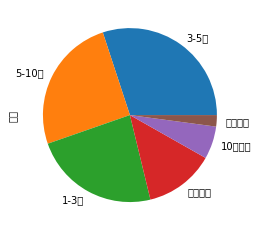

In [254]:
display(数据分析_总['经验'].describe())

display(数据分析_总['经验'].value_counts())
数据分析_总['经验'].value_counts().plot.pie()

### 公司地点  （字符处理）


,0
count,19040
unique,127
top,上海
freq,3511


上海    3511
深圳    1946
广州    1570
北京    1480
杭州    1096
      ... 
娄底      10
拉萨      10
秦皇      10
岳阳      10
鄂尔      10
Name: 0, Length: 127, dtype: int64

/Users/autumnhui/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 19978 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/autumnhui/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 28023 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/autumnhui/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 19978 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/autumnhui/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 28023 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/autumnhui/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 28145 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/autumnhui/anaconda3/lib/python3.7/site-packages/matplotlib/bac

/Users/autumnhui/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 30410 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/autumnhui/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 20020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/autumnhui/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 27778 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/autumnhui/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 20020 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/autumnhui/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 27778 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/autumnhui/anaconda3/lib/python3.7/site-packages/matplotlib/backe

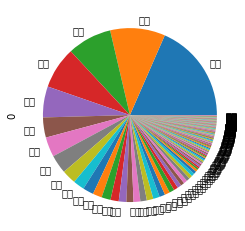

In [267]:
公司地点_待处理=数据分析_总['公司地点'].to_list()
# display(公司地点_待处理)

# 抽取公司地点的城市

# 去除nan值
_公司地点_ = [i for i in 公司地点_待处理 if str(i) != 'nan' ] 
# _公司地点_

公司地点列表=[]
for i in _公司地点_:
   公司地点列表.append(i[:2])
# 公司地点列表

# 创建表格
公司地点=pd.DataFrame(公司地点列表)
公司地点

# 地区分析
display(公司地点.describe())

display(公司地点[0].value_counts())
公司地点[0].value_counts().plot.pie()

### 发布公司来源

In [224]:
display(数据分析_总['公司名称'].describe())

数据分析_总['公司名称'].value_counts()

count             20400
unique             1150
top       辉柏嘉(广州)文具有限公司
freq                290
Name: 公司名称, dtype: object

辉柏嘉(广州)文具有限公司     290
米高蒲志国际(香港)有限公司    220
新华三集团             180
昆明星耀集团实业有限公司      170
特变电工新能源           150
                 ... 
浙江华正新材料             6
北威(重庆)科技股份有限公司      4
北京希普曼技贸有限公司         4
深圳众商铸信科技有限公司        3
地上铁租车(深圳)有限公司       3
Name: 公司名称, Length: 1150, dtype: int64

### 薪水

count     20400
unique      291
top          面议
freq       4617
Name: 薪水, dtype: object

面议            4617
10-15k·12薪    1023
6-8k·12薪       640
8-10k·12薪      560
8-12k·12薪      540
              ... 
7-16k·14薪       10
10k·12薪         10
20-33k·12薪      10
7-11k·13薪       10
3-7k·13薪        10
Name: 薪水, Length: 291, dtype: int64

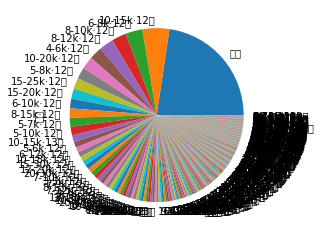

In [247]:

display(数据分析_总['薪水'].describe())
display(数据分析_总['薪水'].value_counts())
数据分析_总['薪水'].value_counts().plot.pie()

### 职称

count     20400
unique     1641
top        销售经理
freq        140
Name: 职称, dtype: object

销售经理                          140
销售代表                          140
产品经理                          140
销售工程师                         110
业务代表                           80
                             ... 
菜鸟-高级JAVA工程师/技术专家-仓储行业解决方案      4
国际贸易总经理                         4
制单员                             4
渠道商务拓展                          3
新能源汽车维修专员                       3
Name: 职称, Length: 1641, dtype: int64

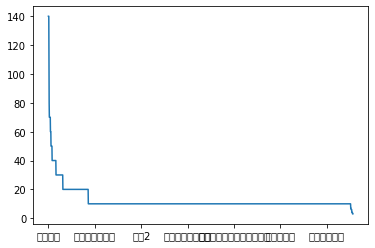

In [269]:
display(数据分析_总['职称'].describe())
display(数据分析_总['职称'].value_counts())
数据分析_总['职称'].value_counts().plot()

In [302]:
广州数据=数据分析_总.set_index("公司地点").loc["广州"]
广州数据['薪水'].value_counts()

面议            140
10-15k·12薪     30
6-10k·12薪      30
5-7k·12薪       20
5-10k·12薪      20
7-15k·12薪      20
3-5k·12薪       20
5-9k·12薪       10
2-3k·12薪       10
8-10k·12薪      10
10-15k·13薪     10
16-20k·12薪     10
15-20k·12薪     10
30-40k·12薪     10
10-18k·13薪     10
4-5k·12薪       10
12-20k·12薪     10
18-25k·12薪     10
7-10k·12薪      10
20-30k·12薪     10
8-12k·12薪      10
15-25k·12薪     10
8-18k·12薪      10
3-4k·12薪       10
6-9k·15薪       10
20-30k·13薪     10
15-30k·12薪     10
9-13k·12薪      10
6-10k·13薪      10
6-8k·12薪       10
40-60k·12薪     10
10-30k·12薪     10
7-12k·12薪      10
18-28k·12薪     10
Name: 薪水, dtype: int64

In [326]:
数据分析_总.set_index(['公司地点','学历','经验'])

,,,序列,薪水,时间,职称,公司名称,链结,公司URL,热门公司类型
公司地点,学历,经验,,,,,,,,
NaN,本科及以上,5-10年,0,50-80k·12薪,2020年04月26日,产品总监,敦煌网,https://www.liepin.com/job/1927774223.shtml,https://www.liepin.com/company/7862497/,互联网/电商
南通-崇川区,本科及以上,3-5年,1,12-18k·12薪,2020年04月26日,南通城市经理,爱回收,https://www.liepin.com/job/1927773439.shtml,https://www.liepin.com/company/7868039/,互联网/电商
上海-五里桥,统招本科,3-5年,2,15-25k·12薪,2020年04月26日,销售经理,北京荷月科技有限公司,https://www.liepin.com/job/1927771271.shtml,https://www.liepin.com/company/9218800/,互联网/电商
上海-浦东新区,本科及以上,5-10年,3,30-45k·16薪,2020年04月26日,大数据开发工程师,上海基分文化传播,https://www.liepin.com/job/1927770805.shtml,https://www.liepin.com/company/8895584/,互联网/电商
深圳-南山区,本科及以上,3-5年,4,15-30k·14薪,2020年04月26日,资金业务产品经理,畅捷通支付北京,https://www.liepin.com/job/1927767527.shtml,https://www.liepin.com/company/8577672/,互联网/电商
...,...,...,...,...,...,...,...,...,...,...
郑州,统招本科,10年以上,20755,20-40k·12薪,2020年04月26日,草坪养护总监,恒大集团,https://www.liepin.com/job/1927772099.shtml,https://www.liepin.com/company/850378/,其他行业
济南,统招本科,10年以上,20756,20-40k·12薪,2020年04月26日,草坪养护总监,恒大集团,https://www.liepin.com/job/1927772097.shtml,https://www.liepin.com/company/850378/,其他行业
潍坊,统招本科,10年以上,20757,20-40k·12薪,2020年04月26日,草坪养护总监,恒大集团,https://www.liepin.com/job/1927772095.shtml,https://www.liepin.com/company/850378/,其他行业
